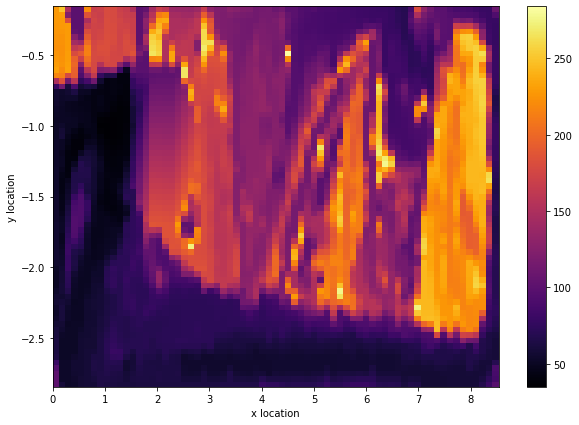

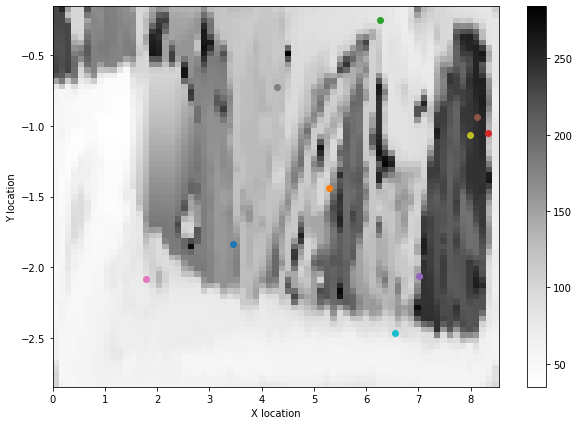

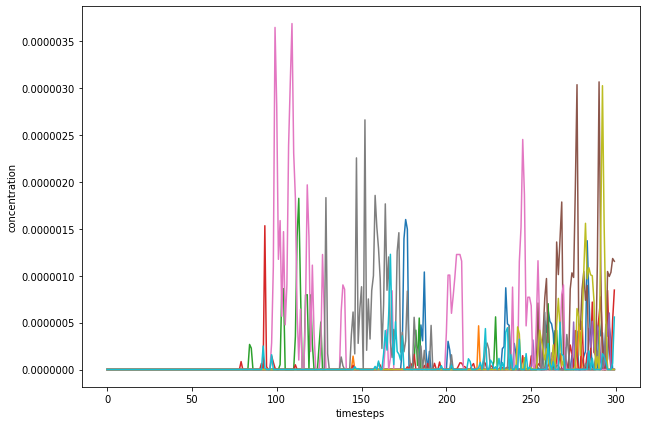

 89%|████████▉ | 89/100 [42:55<04:40, 25.53s/it]/home/david/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:773: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence) is True):
100%|██████████| 100/100 [47:54<00:00, 28.74s/it]


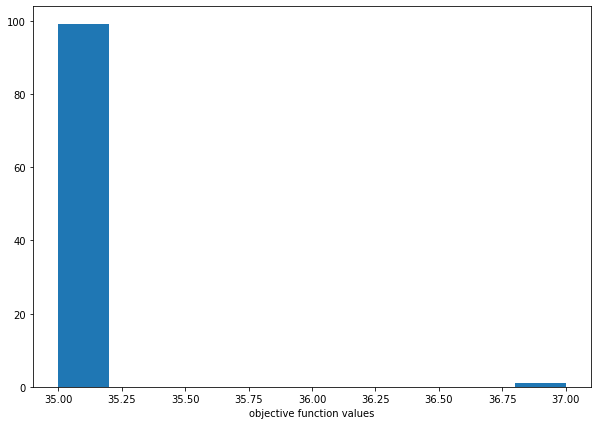

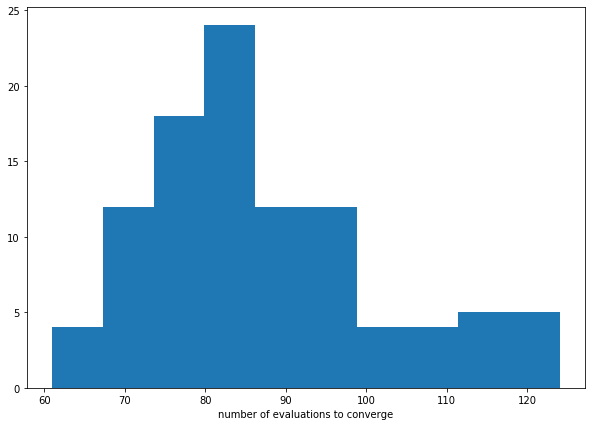

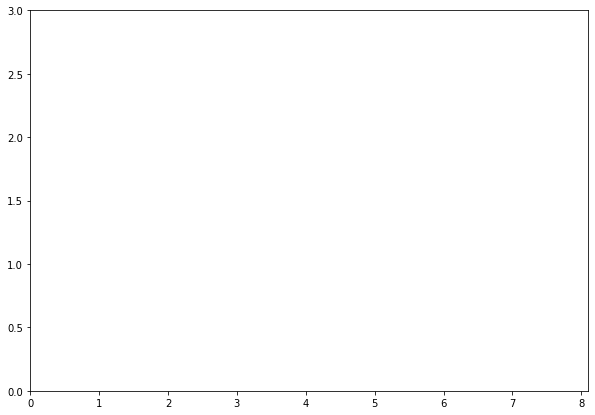

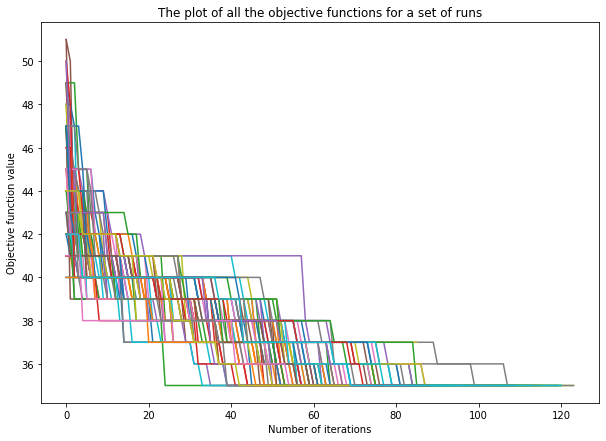

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


from SDOptimizer.SDOptimizer import SDOptimizer
plt.rcParams["figure.figsize"] = (10, 7)

DATA_DIR = "data/data 2-19-10-20200329T152004Z-001" # this data was emailed around
DATA_FILE = "exportUSLab.csv"  # Points to the data Katie gave us
SDO = SDOptimizer()

SDO.load_timestep_directory(DATA_DIR)
source1 = SDO.get_time_to_alarm(False, False) # the default value of flip is false, so this is simply included for clarity
source2 = SDO.get_time_to_alarm(True, False) # flip about the x axis
source3 = SDO.get_time_to_alarm(False, True) # flip about the x axis
source4 = SDO.get_time_to_alarm(False, False, visualize=True) # flip about both axis 
smoke_sources = [source1, source2, source3, source4]

vals, locs, iterations, func_values = SDO.evaluate_optimization(smoke_sources, 4, genetic=True, num_iterations=100)

In [2]:
# save these if you want to use them again
np.save("vals.npy", np.asarray(vals))
np.save("locs.npy", np.asarray(locs))
np.save("iterations.npy", np.asarray(iterations))
np.save("func_values.npy", np.asarray(func_values))

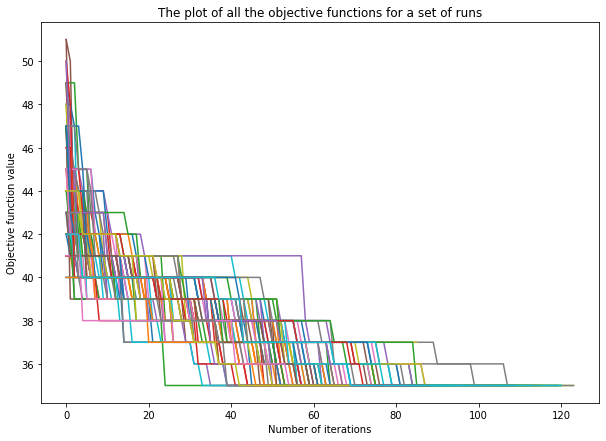

--Call--
> /home/david/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
-> def __call__(self, result=None):
(Pdb) c


In [3]:
import numpy as np
import matplotlib
import pdb
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm
#import seaborn as sns

from SDOptimizer.SDOptimizer import SDOptimizer
from SDOptimizer.visualization import show_optimization_runs
plt.rcParams["figure.figsize"] = (10, 7)

SDO = SDOptimizer()

vals = np.load("vals.npy")
iterations = np.load('iterations.npy')
locs = np.load("locs.npy")
func_values = np.load("func_values.npy", allow_pickle=True)
#SDO.show_optimization_statistics(vals, iterations, locs)
show_optimization_runs(func_values)
import pdb; pdb.set_trace()


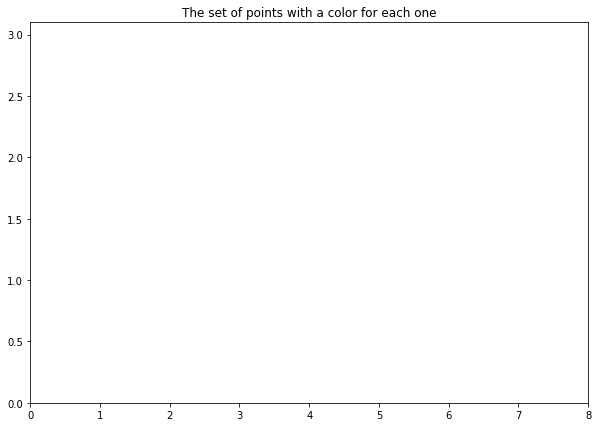

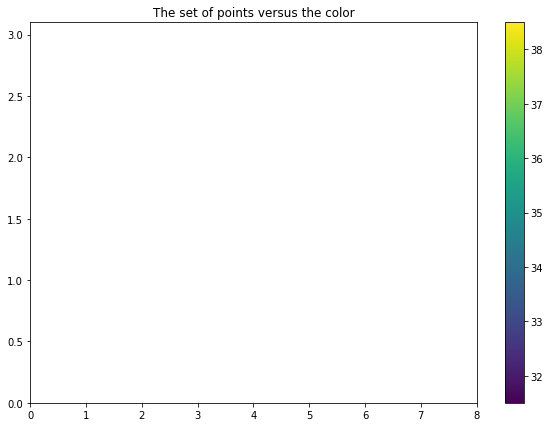

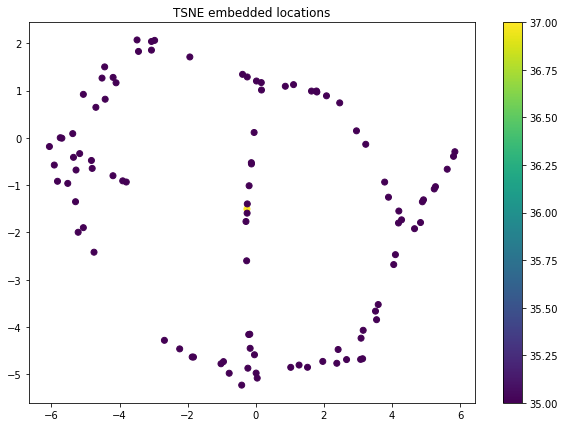

In [4]:
num_points = len(locs)
colormapper = cm.get_cmap('gist_rainbow', num_points)
#clrs = sns.color_palette('hls', n_colors=num_points)  # a list of RGB tuples

for i, loc in enumerate(locs):
    plt.scatter(loc[::2], loc[1::2], c=[colormapper(i/float(num_points))])

plt.title("The set of points with a color for each one")
plt.ylim(0,3.1)
plt.xlim(0,8)
plt.show()
plt.cla()

for i, loc in enumerate(locs):
    color = np.ones_like(loc[::2]) * vals[i]
    plt.scatter(loc[::2], loc[1::2],c=color)

plt.title("The set of points versus the color")
plt.colorbar()
plt.ylim(0,3.1)
plt.xlim(0,8)
plt.show()
plt.cla()
    
embedded_locs = TSNE(n_components=2).fit_transform(locs)
plt.scatter(embedded_locs[:,0], embedded_locs[:,1], c=vals)
plt.colorbar()
plt.title("TSNE embedded locations")
plt.show()